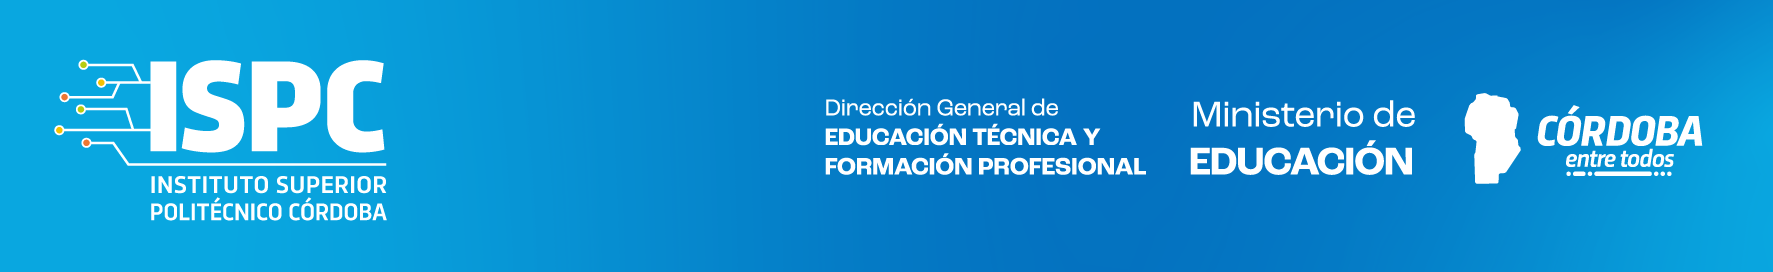

<br>
<br>

# Evidencia N° 6



<br>

# **Presentación de Analista de Datos: 26/10**



### Docentes:
- Marcos Ugarte
- Nahuel Pratta






### Alumnos Integrantes:
- Erick López
- Christian Nüesch
- Débora Zurita


<br>
<br>

pie_de_página.png

<br>
<br>

# Carga y preparación del Dataset


<br>

En esta etapa, procederemos a cargar el conjunto de datos que ha sido procesado y curado en fases anteriores para asegurar su calidad y relevancia. Utilizaremos la librería Pandas para facilitar la manipulación de los datos. Dependiendo de tu entorno de trabajo, hay dos opciones para cargar el dataset:

 - Puedes subir el archivo CSV manualmente a la sección de archivos de Google Colab y luego cargarlo.
 - Puedes leer el archivo directamente desde un recurso online, como GitHub, utilizando la URL del archivo.

<br>

In [6]:

# Importamos la función 'data_table' de Google Colab y habilitamos el formateador de DataFrames.
# Esto permite una visualización más interactiva de los DataFrames en el entorno de Colab.

from google.colab import data_table
data_table.enable_dataframe_formatter()


In [7]:

# Importamos las librerías necesarias para cargar el dataset y
# realizar análisis posteriores
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuramos Pandas para mostrar los números flotantes con dos decimales,
# evitando así la notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Cargamos el dataset en un DataFrame llamado 'data'

# Para cargar el dataset desde Google Colab de manera manual en la seccion de archivos, usa la siguiente línea
# data = pd.read_csv('autos_argentina_curado.csv')

# Para leer el archivo directamente desde GitHub, utiliza la siguiente línea
data = pd.read_csv('https://raw.githubusercontent.com/ISPC-TSCDIA/Data24_PPI/refs/heads/main/datos/autos_argentina_curado.csv')

# Verificamos el dataset
data


,Marca,Modelo,Año,Color,Combustible,Puertas,Caja,Motor,Carrocería,Kilómetros,Precio,Moneda,Año_zscore
0,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,10850000,pesos,1.55
1,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,35500,dólares,1.55
2,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,5800000,pesos,0.74
3,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,34500,dólares,1.55
4,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,25000,dólares,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.80,SUV,52000,5250000,pesos,0.47
496,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,49000,46000,dólares,0.74
497,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.60,SUV,75358,3960000,pesos,0.20
498,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,57500,44900,dólares,0.74


<br>

En los datos recolectados, se encuentran registros de autos en pesos y en dólares. Para unificar la moneda, realizamos una transformación en el dataframe para convertir todos los valores a dólares.

<br>

Optamos por esta alternativa considerando la posibilidad de añadir más registros en el futuro, lo que garantiza que todos los datos estén en una moneda constante y unificada.

<br>

Sin esta unificación, los análisis quedarían sesgados. La primera visualización del dataset muestra una gran diferencia nominal debido a la brecha cambiaria.

<br>

**Elección del tipo de cambio**

En Argentina, el tipo de cambio paralelo, conocido como "dólar blue", ofrece una mejor representación de la realidad económica para dolarizar precios en un dataset, especialmente para bienes de alto valor como vehículos. Esto se debe a que refleja de manera más precisa el acceso real a dólares, el poder adquisitivo y un ajuste más fiel a la realidad económica. Por lo tanto, utilizar el tipo de cambio paralelo puede mejorar la capacidad predictiva de los modelos. En conclusión, el tipo de cambio paralelo ofrece una mejor representación de la realidad económica de las transacciones de vehículos en Argentina.

<br>

**Tipo de cambio con el que se trabajará:** 1USD = 380ARS

Fuente de la cotización: https://dolarhistorico.com/cotizacion-dolar-blue/mes/enero-2023

<br>


In [8]:

# Definimos la tasa de cambio (1 USD = 380 ARS)
tipo_cambio = 380

# Función para convertir precios de pesos a dólares
def convertir_a_dolar(row):
    if row['Moneda'] == 'pesos':
        return row['Precio'] / tipo_cambio
    return row['Precio']

# Aplicamos la función a cada fila del dataframe y redondeamos a dos decimales
data['Precio'] = data.apply(lambda x: round(convertir_a_dolar(x), 2), axis=1)

# Verificamos el dataframe transformado
data


,Marca,Modelo,Año,Color,Combustible,Puertas,Caja,Motor,Carrocería,Kilómetros,Precio,Moneda,Año_zscore
0,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,28552.63,pesos,1.55
1,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,35500.00,dólares,1.55
2,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,15263.16,pesos,0.74
3,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,34500.00,dólares,1.55
4,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,25000.00,dólares,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.80,SUV,52000,13815.79,pesos,0.47
496,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,49000,46000.00,dólares,0.74
497,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.60,SUV,75358,10421.05,pesos,0.20
498,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,57500,44900.00,dólares,0.74


<br>

Dado que las columnas `Moneda` y `Año_zscore` (esta última proveniente de otro análisis) ya no serán necesarias, las eliminamos del dataframe.

Para realizar esta acción utilizamos el método `drop()` de Pandas, donde:

- El parámetro `columns=['Moneda', 'Año_zscore']` especifica las columnas que se quieren eliminar

- `drop()` devuelve una copia del dataframe sin las columnas especificadas, por lo que reasignamos el resultado a `data`.

<br>


In [9]:

# Eliminamos las columnas 'Moneda' y 'Año_zscore'
data = data.drop(columns=['Moneda', 'Año_zscore'])

# Verificamos el dataframe sin esas columnas
data


,Marca,Modelo,Año,Color,Combustible,Puertas,Caja,Motor,Carrocería,Kilómetros,Precio
0,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,28552.63
1,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,35500.00
2,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,15263.16
3,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,34500.00
4,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,25000.00
...,...,...,...,...,...,...,...,...,...,...,...
495,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.80,SUV,52000,13815.79
496,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,49000,46000.00
497,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.60,SUV,75358,10421.05
498,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,57500,44900.00


<br>
<br>

pie_de_página.png

<br>
<br>

# Preprocesamientos de los datos

El preprocesamiento de datos es esencial para transformar datos sin procesar en un formato comprensible y utilizable para el análisis. Este proceso garantiza que los datos estén listos para las etapas de exploración, modelado e interpretación.

<br>
<br>

### División del dataset en conjunto de entrenamiento y prueba

Para dividir el conjunto de datos en entrenamiento y prueba, utilizamos la función train_test_split de la librería scikit-learn. Este proceso es para evaluar el rendimiento de un modelo predictivo. Entonces:

- Cargamos las bibliotecas necesarias para la manipulación y análisis de datos.
- Selección de variables en donde separamos las características (X) de la variable objetivo (y).
- Utilizamos train_test_split para dividir el conjunto de datos en conjuntos de entrenamiento y prueba, asegurando que el modelo se entrene con un 80% de los datos y se evalúe con el 20% restante.

In [10]:

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Definimos las variables independientes y dependientes
X = data.drop(['Precio'], axis=1)  # Variables independientes: todo menos 'Precio'
y = data['Precio']                  # Variable dependiente: 'Precio'

# Dividimos el dataset en un 80% para entrenamiento y un 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<br>

Los elementos y parámetros principales que nos quedan son los siguientes:

- `X` : Es el conjunto de características o todas las variables que se usarán para predecir. Es todo el conjunto de datos excepto la columna que se está tratando de predecir (en nuestro caso, el "Precio"). En otras palabras, son las entradas que se utilizan para hacer las predicciones.

  Ejemplo de columnas en `X`: Marca, Modelo, Año, Kilómetros, Motor, etc.

- `y` : La variable objetivo  o respuesta. Es la columna que estamos tratando de predecir, que en este caso es "Precio".

  Ejemplo: Los precios de los autos.

<br>

- `train_test_split` : Esta es la función que divide propiamente el conjunto de datos en dos partes:
  - Un conjunto de entrenamiento (`train`), que se usa para entrenar el modelo.
  - Un conjunto de prueba (`test`), que se usa para evaluar el modelo una vez entrenado.

<br>

- `X_train`, `X_test`, `y_train`, `y_test` :

  - `X_train` : Estas son las características (variables predictoras) que el modelo utilizará para entrenarse. Es una parte de las filas de X.
  Ejemplo: Si se tienen 1000 filas en total y se decide usar el 80% para entrenamiento, entonces `X_train` contendrá las características de 800 filas.

  - `y_train` : Estos son los valores de la variable objetivo (Precio) correspondientes a las filas seleccionadas en `X_train` . Aquí es donde el modelo aprenderá la relación entre las características y el valor a predecir (Precio).

  - `X_test` : Estas son las características de las filas que el modelo no verá durante el entrenamiento. Se utilizan para evaluar cómo de bien generaliza el modelo. Estas características provienen del 20% restante (test).

  - `y_test` : Son los valores reales del precio de las filas seleccionadas en `X_test` . Después de entrenar el modelo, se usará este conjunto para ver qué tan bien el modelo predice el precio en datos nuevos (que no se usaron en el entrenamiento).

<br>

- `test_size=0.2` : Este parámetro indica el porcentaje de los datos que se usarán para el conjunto de prueba. En este caso, el 20% de los datos (0.2) serán utilizados para prueba, y el 80% restante (0.8) se usarán para entrenar el modelo.

- `random_state=40` : El parámetro `random_state` es una semilla que se utiliza para asegurar que la división de los datos sea reproducible. En este caso, se usa el valor 40 (aunque puede ser cualquier número). Esto significa que si se vuelve a ejecutar el código con el mismo valor de `random_state`, se obtendrá siempre la misma división entre entrenamiento y prueba.
  - Sin este valor, cada vez que se ejecute `train_test_split`, se obtendría una división diferente de los datos. `random_state` es útil cuando se quiere que los experimentos sean reproducibles y que otras personas (o uno mismo) obtengan los mismos resultados en el futuro.

De esta manera, podemos entrenar los modelos con `X_train` e `y_train`, y luego evaluar su rendimiento con los conjuntos `X_test` e `y_test`.

<br>

|||
|-|-|
|`X_train`|Características para entrenar el modelo.|
|`y_train`|Valores de la variable objetivo para entrenar el modelo.|
|`X_test`|Características para evaluar el modelo.|
|`y_test`|Valores reales (objetivo) correspondientes a `X_test` para evaluar el rendimiento del modelo.|
|`test_size=0.2`|Usa el 20% de los datos para prueba, y el 80% para entrenamiento.|
|`random_state=42`|Garantiza que la división sea la misma cada vez que ejecutes el código.|


<br>
<br>

Verificamos la forma de los conjuntos divididos:


In [11]:

# Mostrar las dimensiones de los datos de entrada y de la variable objetivo
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (400, 10)
Forma de y_train: (400,)
Forma de X_test: (100, 10)
Forma de y_test: (100,)


<br>
<br>

## Transformación de variables categóricas para regresión lineal múltiple.


Dado que el modelo de regresión lineal múltiple requiere trabajar únicamente con variables numéricas o cuantitativas, es necesario realizar ciertos pasos previos para transformar las variables categóricas del dataframe (como Marca, Color, Combustible, etc.) en representaciones numéricas. Para lograr esto, se pueden utilizar técnicas como One-Hot Encoding o Label Encoding.

Ya que las categorías en el dataset no tienen un orden específico, One-Hot Encoding es la mejor opción porque permite representar las variables categóricas de manera adecuada sin inducir relaciones numéricas incorrectas (como sucede con Label Encoding). Además, dado que el dataset no es muy grande, el aumento en el número de columnas no afectará significativamente el rendimiento del modelo.

In [12]:

# Definimos las columnas categóricas y numéricas
columnas_categoricas = X_train.select_dtypes(include=['object']).columns.tolist()
columnas_numericas = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Mostrar las columnas categóricas y numéricas
print("Columnas categóricas:", columnas_categoricas)
print("Columnas numéricas:", columnas_numericas)


Columnas categóricas: ['Marca', 'Modelo', 'Color', 'Combustible', 'Caja', 'Carrocería']
Columnas numéricas: ['Año', 'Puertas', 'Motor', 'Kilómetros']


<br>

## One-Hot Encoding


Es una técnica utilizada para convertir variables categóricas en un formato adecuado para algoritmos de aprendizaje automático. En este método, cada categoría de una variable se transforma en una nueva columna binaria, donde un valor de 1 indica la presencia de esa categoría en una observación, mientras que un valor de 0 indica su ausencia. Esto permite que los algoritmos interpreten cada categoría de manera independiente, evitando así que se introduzca un orden artificial entre ellas.


In [13]:

# Agrupación de categorías raras en "Otras" (si es necesario)
def agrupar_categorias_raras(data, columna, umbral=0.05):
    if columna in data.columns:
        frecuencia = data[columna].value_counts(normalize=True)
        categorias_raras = frecuencia[frecuencia < umbral].index
        data[columna] = data[columna].apply(lambda x: x if x not in categorias_raras else 'Otras')
    return data

# Aplicamos la agrupación de categorías raras
for columna in columnas_categoricas:
    X_train = agrupar_categorias_raras(X_train, columna)
    X_test[columna] = X_test[columna].apply(lambda x: x if x in X_train[columna].unique() else 'Otras')

# Definimos el preprocesador
preprocesador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), columnas_categoricas)
    ]
)

# Ajuste y transformación
preprocesador.fit(X_train)
X_train_escalado = preprocesador.transform(X_train)
X_test_escalado = preprocesador.transform(X_test)

# Convertimos a DataFrame para visualización
X_train_escalado_data = pd.DataFrame(X_train_escalado, columns=preprocesador.get_feature_names_out())
X_test_escalado_data = pd.DataFrame(X_test_escalado, columns=preprocesador.get_feature_names_out())

# Verificación
print("Estadísticas de datos numéricos - Entrenamiento")
print(X_train_escalado_data.select_dtypes(include=['float64', 'int64']).describe())


Estadísticas de datos numéricos - Entrenamiento
       num__Año  num__Puertas  num__Motor  num__Kilómetros  \
count    400.00        400.00      400.00           400.00   
mean      -0.00          0.00        0.00            -0.00   
std        1.00          1.00        1.00             1.00   
min       -5.56         -3.30       -1.25            -1.63   
25%       -0.55         -0.63       -0.40            -0.69   
50%        0.25          0.71       -0.40            -0.18   
75%        0.77          0.71        0.17             0.54   
max        1.56          0.71        6.39             5.48   

       cat__Marca_Citroën  cat__Marca_Ford  cat__Marca_Otras  \
count              400.00           400.00            400.00   
mean                 0.05             0.11              0.27   
std                  0.22             0.31              0.44   
min                  0.00             0.00              0.00   
25%                  0.00             0.00              0.00   
50%      

<br>
<br>

pie_de_página.png

<br>
<br>

# Regresión Lineal Múltiple


<br>

## Relación entre variables

Correlación lineal entre variables numéricas

In [14]:

# Crear una copia temporal de X_train_escalado_data con la columna 'precio' incluida
X_train_with_precio = X_train_escalado_data.copy()
X_train_with_precio['Precio'] = y_train.reset_index(drop=True)

# Calcular la matriz de correlación con la copia temporal
corr_matrix = X_train_with_precio.corr(method='pearson')

# Crear una máscara para los valores duplicados en la matriz de correlación
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan

# Convertir la matriz de correlación en un formato 'tidy'
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})

# Eliminar valores nulos (ya que hemos creado la máscara en la parte inferior)
corr_matrix_tidy = corr_matrix_tidy.dropna()

# Calcular el valor absoluto de las correlaciones para ordenar
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()

# Ordenar las correlaciones por su valor absoluto de mayor a menor
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)

# Mostrar las correlaciones
corr_matrix_tidy


,variable_1,variable_2,r,r_abs
0,num__Año,num__Kilómetros,-0.68,0.68
1,num__Motor,Precio,0.59,0.59
2,cat__Combustible_Nafta,cat__Carrocería_Pick-Up,-0.59,0.59
3,num__Motor,cat__Carrocería_Pick-Up,0.46,0.46
4,cat__Combustible_Nafta,cat__Combustible_Otras,-0.45,0.45
...,...,...,...,...
271,cat__Marca_Ford,cat__Color_Gris,-0.00,0.00
272,cat__Marca_Renault,cat__Color_Otras,0.00,0.00
273,cat__Marca_Toyota,cat__Color_Negro,0.00,0.00
274,cat__Marca_Ford,cat__Carrocería_SUV,-0.00,0.00


<br>

### Matriz de correlación

La matriz de correlación es una herramienta estadística que permite evaluar la relación entre variables numéricas en un conjunto de datos. En este análisis, se calcula el coeficiente de correlación de Pearson, que mide la fuerza y la dirección de la relación lineal entre pares de variables. Los valores de correlación varían entre -1 y 1, donde:

- Un valor de 1 indica una correlación positiva perfecta: a medida que una variable aumenta, la otra también lo hace.
- Un valor de -1 indica una correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.
- Un valor de 0 sugiere que no hay relación lineal entre las variables.

Para visualizar estas relaciones de manera más intuitiva, se utiliza un heatmap (gráfico de calor). En el heatmap, cada celda representa la correlación entre un par de variables, con colores que indican la fuerza y la dirección de la correlación. Las celdas con tonos oscuros (ya sean rojos o azules) indican correlaciones fuertes, mientras que los tonos claros indican correlaciones débiles.

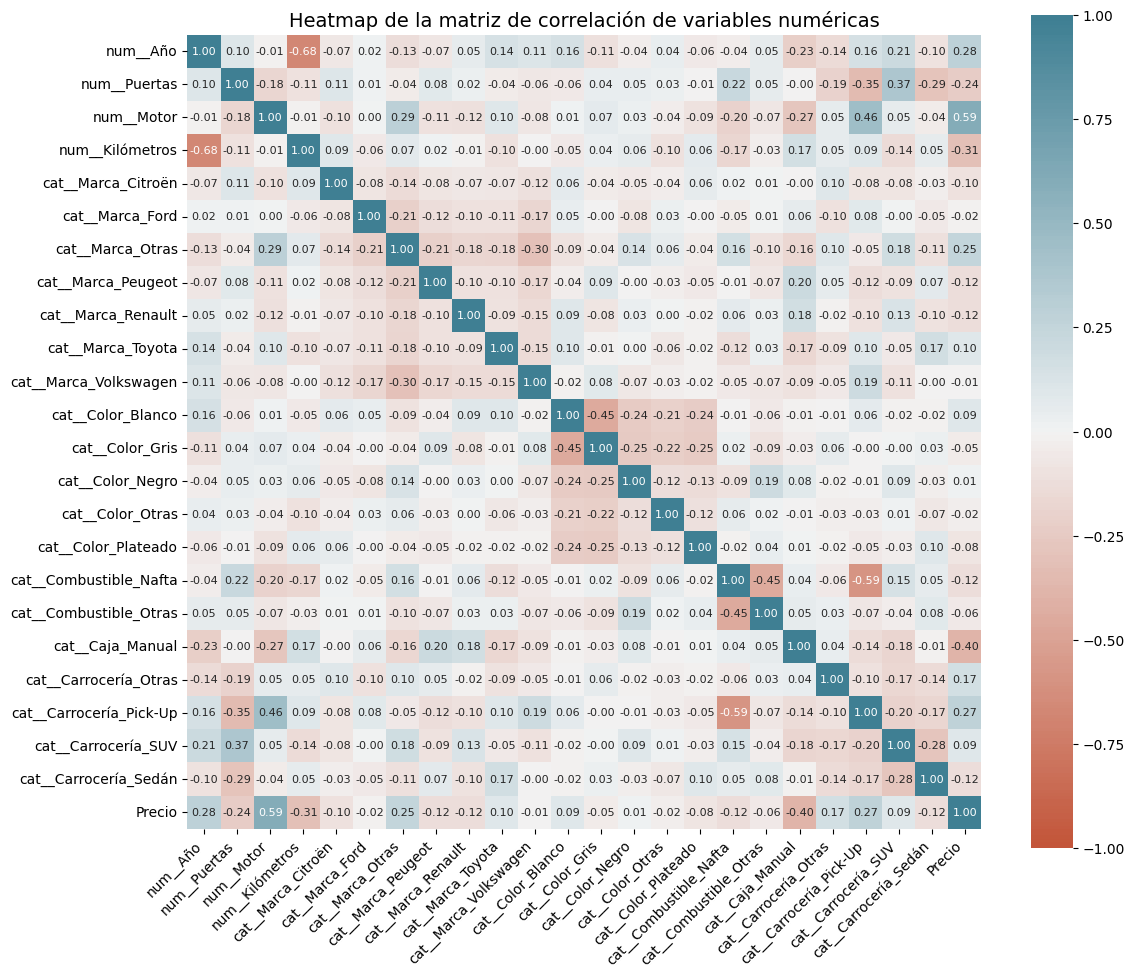

In [15]:

# Calcular la matriz de correlaciones
correlation_matrix = X_train_with_precio.corr()

# Visualizar la matriz de correlación como un gráfico de calor
plt.figure(figsize=(12, 10))  # Ajustar el tamaño de la figura
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",  # Formato de los valores numéricos para mostrar dos decimales
    cbar=True,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# Ajustes en el gráfico
plt.xticks(rotation=45, horizontalalignment='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Heatmap de la matriz de correlación de variables numéricas', fontsize=14)
plt.tight_layout()
plt.show()


<br>

Gráfico de distribución para cada variable numérica

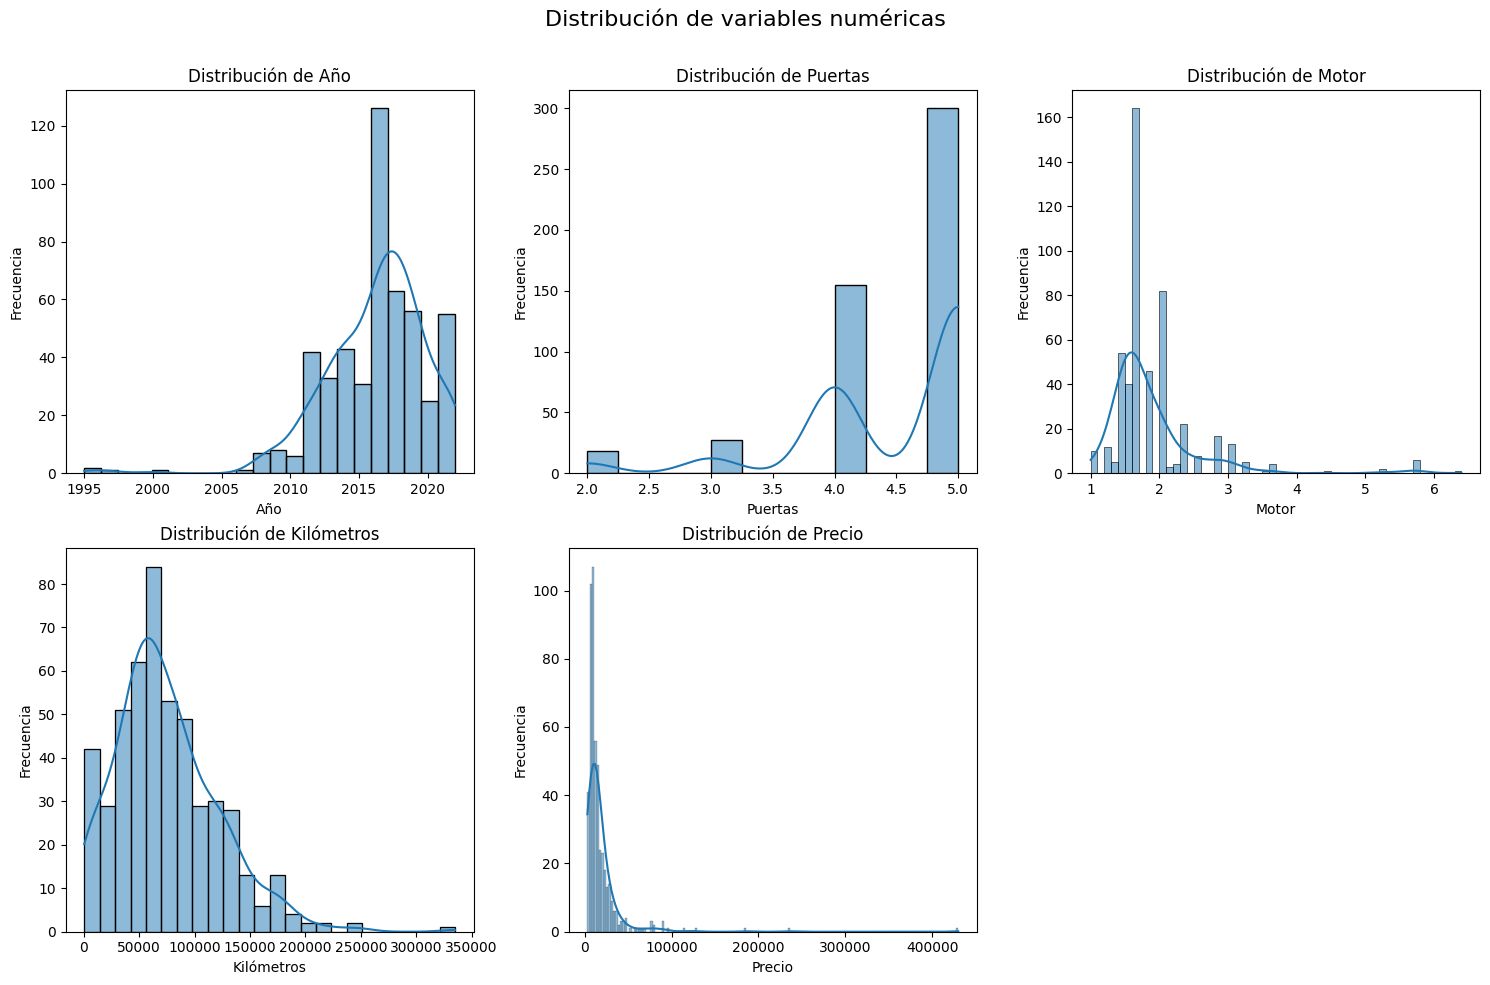

In [16]:
# Obtener las columnas numéricas
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Ajustar número de subplots
num_cols = len(numeric_cols)
nrows = (num_cols // 3) + (num_cols % 3 > 0)
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5 * nrows))
axes = axes.flatten()

# Visualizar la distribución de cada variable numérica
for i, col in enumerate(numeric_cols):
    sns.histplot(data=data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de variables numéricas', fontsize=16)
plt.show()



<br>
<br>
<br>
<br>


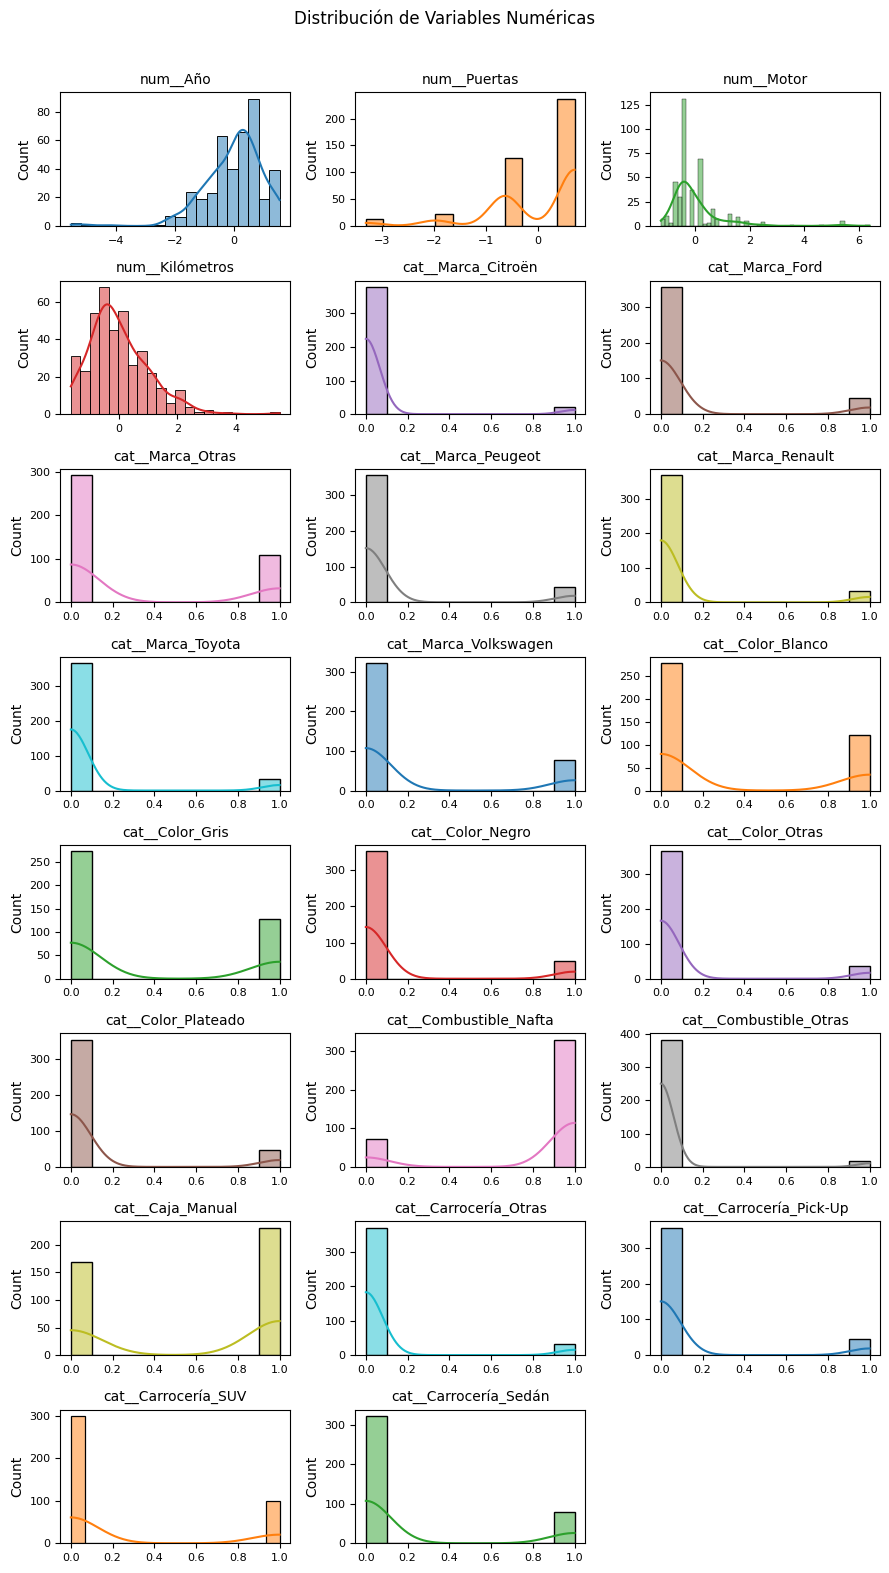

In [28]:

# Cambia esta línea para seleccionar las columnas numéricas escaladas
columnas_numericas_escalado = X_train_escalado_data.select_dtypes(include=np.number).columns

# Ajustar número de subplots en función del número de columnas
n_cols = 3  # Número de columnas
n_rows = int(np.ceil(len(columnas_numericas_escalado) / n_cols))  # Número de filas

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(9, 6*n_rows/3))  # Ajustar figsize
axes = axes.flat

# Obtener el ciclo de colores por defecto
default_colors = list(plt.rcParams['axes.prop_cycle'])

for i, colum in enumerate(columnas_numericas_escalado):
    # Usar el operador módulo para alternar entre los colores
    color = default_colors[i % len(default_colors)]["color"]

    sns.histplot(
        data=X_train_escalado_data,
        x=colum,
        stat="count",
        kde=True,
        color=color,  # Asignar el color
        ax=axes[i]
    )
    axes[i].set_title(colum, fontsize=10)
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel("")

# Asegurarse de que hay un eje para cualquier subplot no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Eliminar ejes vacíos si hay menos columnas que subplots

# Ajustar el layout
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el layout para dejar espacio para el título
fig.suptitle('Distribución de Variables Numéricas', fontsize=12, y=0.98)  # Ajustar el espacio del título

plt.show()  # Asegúrate de mostrar el gráfico


<br>

## Ajuste del modelo

<br>

Ajsute del modelo utilizando el modo fórmula (similar a R)

In [29]:

# Assuming 'data' is your original DataFrame
# Replace this with the actual name of your DataFrame if it's different
data_onehot = pd.get_dummies(data) # Create data_onehot using pd.get_dummies

# Convertir las columnas bool a int
bool_cols = data_onehot.select_dtypes(include='bool').columns
data_onehot[bool_cols] = data_onehot[bool_cols].astype(int)

# Definir X_train y y_train
X_train = data_onehot.drop(columns=['Precio'])  # Variable independiente
y_train = data_onehot['Precio']  # Variable dependiente

# Reemplazar espacios por guiones bajos y eliminar caracteres no permitidos
X_train.columns = X_train.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True)

# Asegurarse de que los nombres de las columnas no tengan caracteres problemáticos
X_train.columns = X_train.columns.str.replace('[-()]', '', regex=True)

# Crear un DataFrame con X_train y y_train combinados
datos_train = X_train.assign(y=y_train).copy()  # Crear el DataFrame combinado

# Generar la fórmula
formula = 'y ~ ' + ' + '.join(X_train.columns)
print("Fórmula:", formula)

# Ajuste del modelo con fórmula
modelo_formula = smf.ols(
    formula=formula,
    data=datos_train
)

# Ajustar el modelo
modelo_res_formula = modelo_formula.fit()

# Mostrar resumen del modelo
print(modelo_res_formula.summary())


Fórmula: y ~ Ao + Puertas + Motor + Kilmetros + Marca_Audi + Marca_BMW + Marca_Baic + Marca_Chery + Marca_Chevrolet + Marca_Citron + Marca_DS + Marca_Dodge + Marca_Fiat + Marca_Ford + Marca_Honda + Marca_Hyundai + Marca_Jeep + Marca_Kia + Marca_MercedesBenz + Marca_Mini + Marca_Mitsubishi + Marca_Nissan + Marca_Peugeot + Marca_RAM + Marca_Renault + Marca_Subaru + Marca_Suzuki + Marca_Toyota + Marca_Volkswagen + Marca_Volvo + Modelo_1500 + Modelo_2008 + Modelo_207 + Modelo_208 + Modelo_220 + Modelo_3008 + Modelo_308 + Modelo_408 + Modelo_500 + Modelo_5008 + Modelo_500X + Modelo_504 + Modelo_960 + Modelo_A1 + Modelo_A3Sportback + Modelo_A4 + Modelo_Aircross + Modelo_Amarok + Modelo_Argo + Modelo_Aveo + Modelo_Berlingo + Modelo_Bora + Modelo_CElyse + Modelo_C3 + Modelo_C3Picasso + Modelo_C30 + Modelo_C4 + Modelo_C4Cactus + Modelo_C4Lounge + Modelo_C4Spacetourer + Modelo_CRV + Modelo_Camry + Modelo_Captur + Modelo_Celta + Modelo_Cerato + Modelo_Civic + Modelo_ClaseA + Modelo_ClaseC + Model

<br>

Ajuste del modelo utilizando matrices X, y (similar a scikit-learn)

In [30]:

# Agregar una columna de 1s a X_train para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
X_train = X_train.rename(columns={'const': 'intercept'})

# Ajustar el modelo con OLS
modelo = sm.OLS(endog=y_train, exog=X_train)  # 'endog' es la variable dependiente (y_train), 'exog' son las variables independientes (X_train)
modelo_res = modelo.fit()

# Paso 3: Mostrar el resumen del modelo
print(modelo_res.summary())


                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     19.83
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          4.23e-108
Time:                        04:21:34   Log-Likelihood:                -5184.4
No. Observations:                 500   AIC:                         1.073e+04
Df Residuals:                     319   BIC:                         1.149e+04
Df Model:                         180                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept           

<br>

## Selección de los mejores predictores

In [32]:

# Función de selección forward (hacia adelante)
def forward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    """
    Realiza un procedimiento de selección de variables hacia adelante (forward)
    utilizando como criterio de bondad la métrica especificada. El procedimiento
    se detiene cuando no es posible mejorar más el modelo añadiendo variables.
    """

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    restantes = X.columns.to_list()
    seleccion = []
    if criterio == 'rsquared_adj':
        mejor_metrica = -np.inf
        ultima_metrica = -np.inf
    else:
        mejor_metrica = np.inf
        ultima_metrica = np.inf

    while restantes:
        metricas = []
        for candidata in restantes:
            seleccion_temp = seleccion + [candidata]
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                mejor_variable = restantes[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                mejor_variable = restantes[np.argmin(metricas)]
            else:
                break

        seleccion.append(mejor_variable)
        restantes.remove(mejor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)


# Función de selección backward (hacia atrás)
def backward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    """
    Realiza un procedimiento de selección de variables hacia atrás (backward)
    utilizando como criterio de bondad la métrica especificada. El procedimiento
    se detiene cuando no es posible mejorar más el modelo eliminando variables.
    """

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    # Se inicia con todas las variables como predictores
    seleccion = X.columns.to_list()
    modelo  = sm.OLS(endog=y, exog=X[seleccion])
    modelo_res = modelo.fit()
    ultima_metrica = getattr(modelo_res, criterio)
    mejor_metrica = ultima_metrica
    if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    while seleccion:
        metricas = []
        for candidata in seleccion:
            seleccion_temp = seleccion.copy()
            seleccion_temp.remove(candidata)
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                peor_variable = seleccion[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                peor_variable = seleccion[np.argmin(metricas)]
            else:
                break

        seleccion.remove(peor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)



<br>


In [33]:

# Función de selección forward (hacia adelante)
predictores_forward = forward_selection(
    X=X_train,     # Matriz de predictores
    y=y_train,     # Variable dependiente
    criterio='aic',  # Puedes usar 'aic', 'bic' o 'rsquared_adj' como criterio
    add_constant=True,  # Añadir constante (intercepto)
    verbose=True   # Mostrar resultados iterativos
)

# Mostrar las variables seleccionadas en forward
print("Mejores predictores (Forward Selection):", predictores_forward)


variables: ['Motor'] | aic: 11490.443
variables: ['Motor', 'Modelo_R8Coup'] | aic: 11083.903
variables: ['Motor', 'Modelo_R8Coup', 'Kilmetros'] | aic: 10988.580
variables: ['Motor', 'Modelo_R8Coup', 'Kilmetros', 'Modelo_ClaseE'] | aic: 10918.766
variables: ['Motor', 'Modelo_R8Coup', 'Kilmetros', 'Modelo_ClaseE', 'Carrocera_Coup'] | aic: 10849.980
variables: ['Motor', 'Modelo_R8Coup', 'Kilmetros', 'Modelo_ClaseE', 'Carrocera_Coup', 'Modelo_F150'] | aic: 10768.498
variables: ['Motor', 'Modelo_R8Coup', 'Kilmetros', 'Modelo_ClaseE', 'Carrocera_Coup', 'Modelo_F150', 'Caja_Automtica'] | aic: 10731.798
variables: ['Motor', 'Modelo_R8Coup', 'Kilmetros', 'Modelo_ClaseE', 'Carrocera_Coup', 'Modelo_F150', 'Caja_Automtica', 'Modelo_Serie3'] | aic: 10710.937
variables: ['Motor', 'Modelo_R8Coup', 'Kilmetros', 'Modelo_ClaseE', 'Carrocera_Coup', 'Modelo_F150', 'Caja_Automtica', 'Modelo_Serie3', 'Marca_MercedesBenz'] | aic: 10695.320
variables: ['Motor', 'Modelo_R8Coup', 'Kilmetros', 'Modelo_ClaseE', '

<br>

In [34]:

# Función de selección backward (hacia atrás)
predictores_backward = backward_selection(
    X=X_train,     # Matriz de predictores
    y=y_train,     # Variable dependiente
    criterio='aic',  # Puedes usar 'aic', 'bic' o 'rsquared_adj' como criterio
    add_constant=True,  # Añadir constante (intercepto)
    verbose=True   # Mostrar resultados iterativos
)

# Mostrar las variables seleccionadas en backward
print("Mejores predictores (Backward Selection):", predictores_backward)


variables: ['intercept', 'Ao', 'Puertas', 'Motor', 'Kilmetros', 'Marca_Audi', 'Marca_BMW', 'Marca_Baic', 'Marca_Chery', 'Marca_Chevrolet', 'Marca_Citron', 'Marca_DS', 'Marca_Dodge', 'Marca_Fiat', 'Marca_Ford', 'Marca_Honda', 'Marca_Hyundai', 'Marca_Jeep', 'Marca_Kia', 'Marca_MercedesBenz', 'Marca_Mini', 'Marca_Mitsubishi', 'Marca_Nissan', 'Marca_Peugeot', 'Marca_RAM', 'Marca_Renault', 'Marca_Subaru', 'Marca_Suzuki', 'Marca_Toyota', 'Marca_Volkswagen', 'Marca_Volvo', 'Modelo_1500', 'Modelo_2008', 'Modelo_207', 'Modelo_208', 'Modelo_220', 'Modelo_3008', 'Modelo_308', 'Modelo_408', 'Modelo_500', 'Modelo_5008', 'Modelo_500X', 'Modelo_504', 'Modelo_960', 'Modelo_A1', 'Modelo_A3Sportback', 'Modelo_A4', 'Modelo_Aircross', 'Modelo_Amarok', 'Modelo_Argo', 'Modelo_Aveo', 'Modelo_Berlingo', 'Modelo_Bora', 'Modelo_CElyse', 'Modelo_C3', 'Modelo_C3Picasso', 'Modelo_C30', 'Modelo_C4', 'Modelo_C4Cactus', 'Modelo_C4Lounge', 'Modelo_C4Spacetourer', 'Modelo_CRV', 'Modelo_Camry', 'Modelo_Captur', 'Modelo_

<br>

In [35]:

# Entrenar el modelo final con las variables seleccionadas (predictores_forward)
modelo_final = sm.OLS(endog=y_train, exog=X_train[predictores_forward])
modelo_final_res = modelo_final.fit()

# Mostrar el resumen del modelo final
print(modelo_final_res.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Precio   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              157.0
Date:                Sun, 27 Oct 2024   Prob (F-statistic):                   2.30e-238
Time:                        04:26:04   Log-Likelihood:                         -5243.5
No. Observations:                 500   AIC:                                  1.056e+04
Df Residuals:                     462   BIC:                                  1.072e+04
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

<br>



In [36]:

# Entrenar el modelo final con las variables seleccionadas (predictores_backward)
modelo_final = sm.OLS(endog=y_train, exog=X_train[predictores_backward])
modelo_final_res = modelo_final.fit()

# Mostrar el resumen del modelo final
print(modelo_final_res.summary())


                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     21.04
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          1.09e-112
Time:                        04:26:14   Log-Likelihood:                -5186.9
No. Observations:                 500   AIC:                         1.072e+04
Df Residuals:                     327   BIC:                         1.145e+04
Df Model:                         172                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Ao                  


<br>
<br>
<br>
<br>



## Diagnóstico de los residuos

In [38]:

# Residuos del modelo
residuos = modelo_final_res.resid

# prediciones de entrenamiento
prediccion_train = modelo_final_res.predict(X_train[predictores_backward])



<br>
<br>
<br>
<br>


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


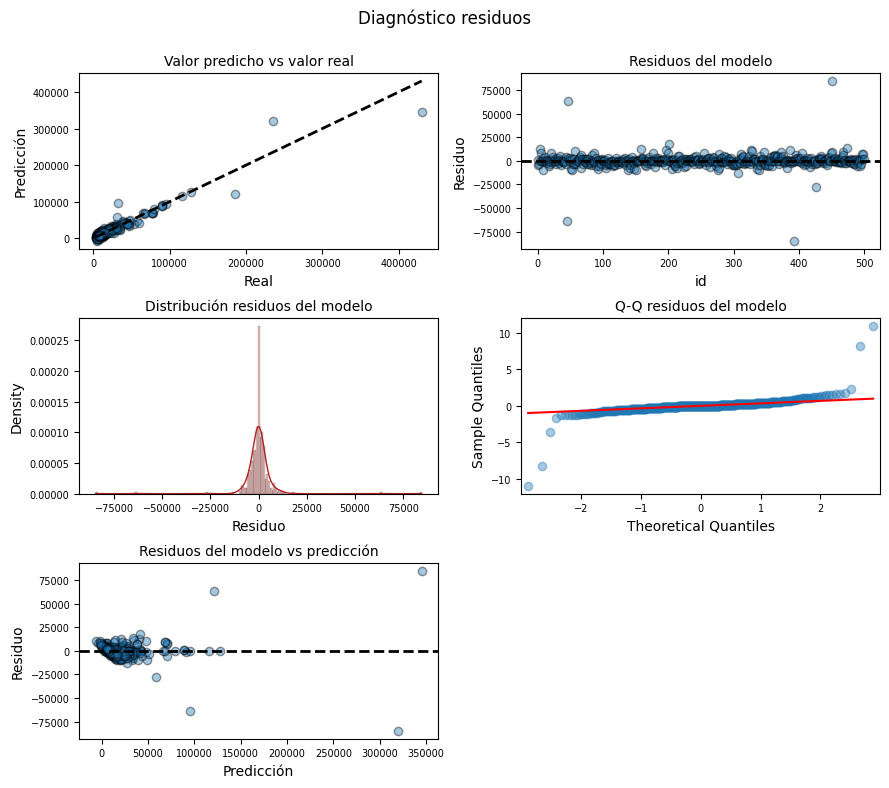

In [39]:

# Creamos los gráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize=10)
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].axhline(y=0, linestyle='--', color='black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data     = residuos,
    stat     = "density",
    kde      = True,
    line_kws = {'linewidth': 1},
    color    = "firebrick",
    alpha    = 0.3,
    ax       = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize=10)
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)

sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize=10)
axes[1, 1].tick_params(labelsize=7)

axes[2, 0].scatter(prediccion_train, residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[2, 0].axhline(y=0, linestyle='--', color='black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize=10)
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize=7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize=12);



<br>
<br>
<br>
<br>



### Test de normalidad


In [40]:

# Normalidad de los residuos Shapiro-Wilk test
shapiro_test = stats.shapiro(residuos)
print(f"Test Shapiro-Wilk: estadístico = {shapiro_test[0]}, p-value = {shapiro_test[1]}")

# Normalidad de los residuos D'Agostino's K-squared test
k2, p_value = stats.normaltest(residuos)
print(f"Test D'Agostino's K-squared: estadístico = {k2}, p-value = {p_value}")


Test Shapiro-Wilk: estadístico = 0.47808900980533686, p-value = 9.790782279109141e-36
Test D'Agostino's K-squared: estadístico = 209.68590239826665, p-value = 2.932816073223577e-46


<br>



### Homodecasticidad


In [42]:

# Prueba de Breusch-Pagan
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuos, X_train[predictores_backward])
print(f"Estadístico= {fvalue}, p-value = {f_p_value}")


Estadístico= 383.4345574818847, p-value = 5.10409303720773e-310


<br>



### Multicolinealidad (Inflación de varianza VIF)


In [43]:

# Correlación entre predictores numéricos
corr_matrix = X_train[predictores_backward].corr(method='pearson')
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})
corr_matrix_tidy = corr_matrix_tidy.dropna()
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)
corr_matrix_tidy


,variable_1,variable_2,r,r_abs
0,Marca_Suzuki,Modelo_Swift,1.00,1.00
1,Marca_Baic,Modelo_X55,1.00,1.00
2,Marca_Subaru,Modelo_XV,1.00,1.00
3,Marca_Chery,Modelo_Tiggo3,1.00,1.00
4,Marca_Dodge,Modelo_Journey,1.00,1.00
...,...,...,...,...
20296,Color_Gris,Modelo_Passat,-0.00,0.00
20297,Color_Gris,Modelo_Tucson,-0.00,0.00
20298,Color_Gris,Modelo_Aircross,-0.00,0.00
20299,Color_Gris,Modelo_Saveiro,-0.00,0.00


In [44]:

# Cálculo del VIF
vif = pd.DataFrame()
vif["variables"] = X_train[predictores_backward].columns
vif["VIF"] = [variance_inflation_factor(X_train[predictores_backward].values, i) for i in range(X_train[predictores_backward].shape[1])]
vif


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero

,variables,VIF
0,Ao,6.90
1,Caja_Automtica,inf
2,Caja_Manual,inf
3,Carrocera_Coup,inf
4,Carrocera_Crossover,inf
...,...,...
198,Modelo_X55,inf
199,Modelo_XV,inf
200,Modelo_Yaris,inf
201,Motor,14.77



<br>
<br>
<br>
<br>


## Predicciones

In [45]:

# Prediciones del conjunto de test
X_test = sm.add_constant(X_test, prepend=True).rename(columns={'const':'intercept'})

# Get predictors from the model's parameters, excluding the intercept
predictores_backward = [p for p in modelo_final_res.params.index if p != 'intercept']

# Ensure all predictors are in X_test and create X_test_selected with them
missing_predictors = [p for p in predictores_backward if p not in X_test.columns]
if missing_predictors:
    # Handle missing predictors (e.g., set them to 0)
    for p in missing_predictors:
        X_test[p] = 0
        print(f"Warning: Predictor '{p}' missing in X_test. Setting to 0.")

# Include the 'intercept' for prediction
X_test_selected = X_test[['intercept'] + predictores_backward]

# Now make predictions
predictions = modelo_final_res.predict(X_test_selected)
predictions


<ipython-input-45-f9b8b9ece791>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[p] = 0
<ipython-input-45-f9b8b9ece791>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[p] = 0
<ipython-input-45-f9b8b9ece791>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[p] = 0
<ipython-inpu

,0
361,-3972443.85
73,-3575005.46
374,-3177567.07
155,-3972443.85
104,-4767320.63
...,...
347,-3972443.85
86,-11325054.06
75,-3177567.07
438,-3177567.07



<br>
<br>
<br>
<br>


In [46]:

# Predicciones con intervalo de confianza
# La columna mean contiene la media de la predicción

# Ensure 'intercept' is included in the predictors
predictores_with_intercept = ['intercept'] + predictores_backward

# Select only the necessary columns from X_test, including 'intercept'
X_test_selected = X_test[[col for col in predictores_with_intercept if col in X_test.columns]]

# If 'intercept' is not in X_test_selected, add it with values of 1
if 'intercept' not in X_test_selected.columns:
    X_test_selected['intercept'] = 1

predicciones = modelo_final_res.get_prediction(exog=X_test_selected).summary_frame(alpha=0.05)
predicciones


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
361,-3972443.85,625670.84,-5203291.74,-2741595.96,-5203435.94,-2741451.76
73,-3575005.46,563073.37,-4682708.80,-2467302.12,-4682869.03,-2467141.89
374,-3177567.07,500475.91,-4162125.86,-2193008.28,-4162306.12,-2192828.02
155,-3972443.85,625670.84,-5203291.74,-2741595.96,-5203435.94,-2741451.76
104,-4767320.63,750865.76,-6244457.62,-3290183.64,-6244577.78,-3290063.48
...,...,...,...,...,...,...
347,-3972443.85,625670.84,-5203291.74,-2741595.96,-5203435.94,-2741451.76
86,-11325054.06,1783723.88,-14834076.13,-7816031.99,-14834126.71,-7815981.41
75,-3177567.07,500475.91,-4162125.86,-2193008.28,-4162306.12,-2192828.02
438,-3177567.07,500475.91,-4162125.86,-2193008.28,-4162306.12,-2192828.02



<br>
<br>
<br>
<br>



## Error de test


In [48]:

# Error de test del modelo
error = rmse(y_test.to_numpy().flatten(), predicciones['mean'])
print(f"El error (rmse) de test es: {error}")


El error (rmse) de test es: 3975849.8333625323


<br>
<br>

# Conclusiones
